<a href="https://colab.research.google.com/github/Jetgar/Tugas-DataScience-BengkelKoding/blob/main/progres_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Tugas 1. EDA (Explanatory Data )

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Impor Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Membaca Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ObesityDataSet.csv")

Informasi Awal Dataset

In [5]:
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data tiap kolom:")
print(df.dtypes)

Jumlah baris dan kolom: (2111, 17)

Tipe data tiap kolom:
Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


Lihat 5 baris pertama

In [6]:
print("\n5 baris pertama:")
print(df.head())


5 baris pertama:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  

Statistik Deskriptif

In [7]:
print("\nDeskripsi Statistik:")
display(df.describe(include='all'))


Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


Cek Missing Values

In [8]:
print("\nMissing Values per Kolom:")
print(df.isnull().sum())


Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


Cek duplikat

In [9]:
print("\nJumlah Duplikat:")
print(df.duplicated().sum())


Jumlah Duplikat:
18


Cek Nilai Unik

In [10]:
print("\nNilai unik per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Nilai unik per kolom:
Age: 1394
Gender: 3
Height: 1562
Weight: 1518
CALC: 5
FAVC: 3
FCVC: 808
NCP: 637
SCC: 3
SMOKE: 3
CH2O: 1263
family_history_with_overweight: 3
FAF: 1186
TUE: 1130
CAEC: 5
MTRANS: 6
NObeyesdad: 7


Cek keseimbangan target kelas

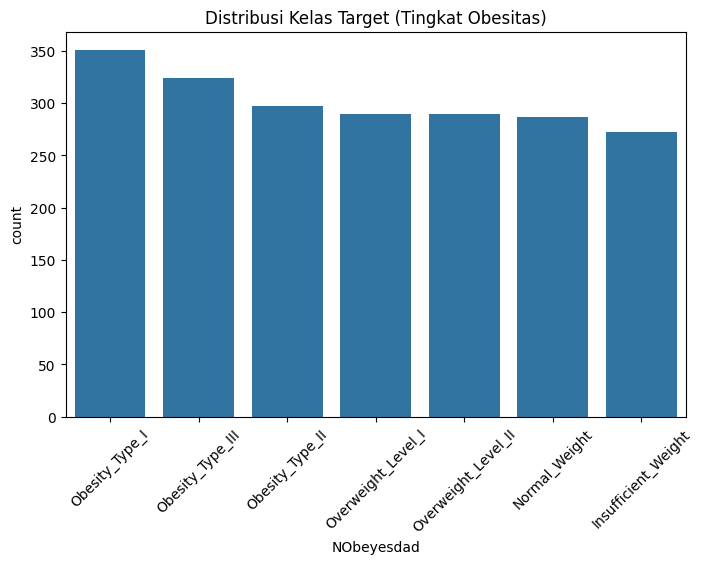

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target (Tingkat Obesitas)")
plt.show()

Menampilkan semua nama kolom dalam dataframe df dalam bentuk list

In [12]:
print(df.columns.tolist())

['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


Korelasi fitur numerik

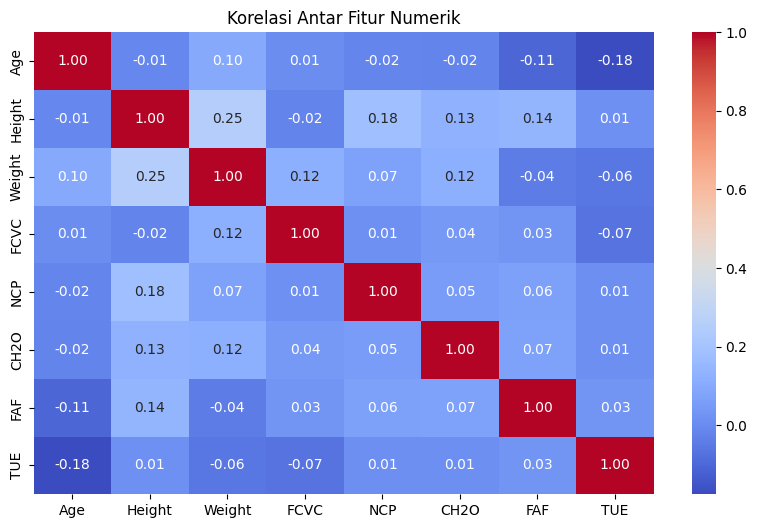

In [13]:
fitur_numerik_murni = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in fitur_numerik_murni:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(df[fitur_numerik_murni].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

Histogram untuk Usia, Tinggi, dan Berat

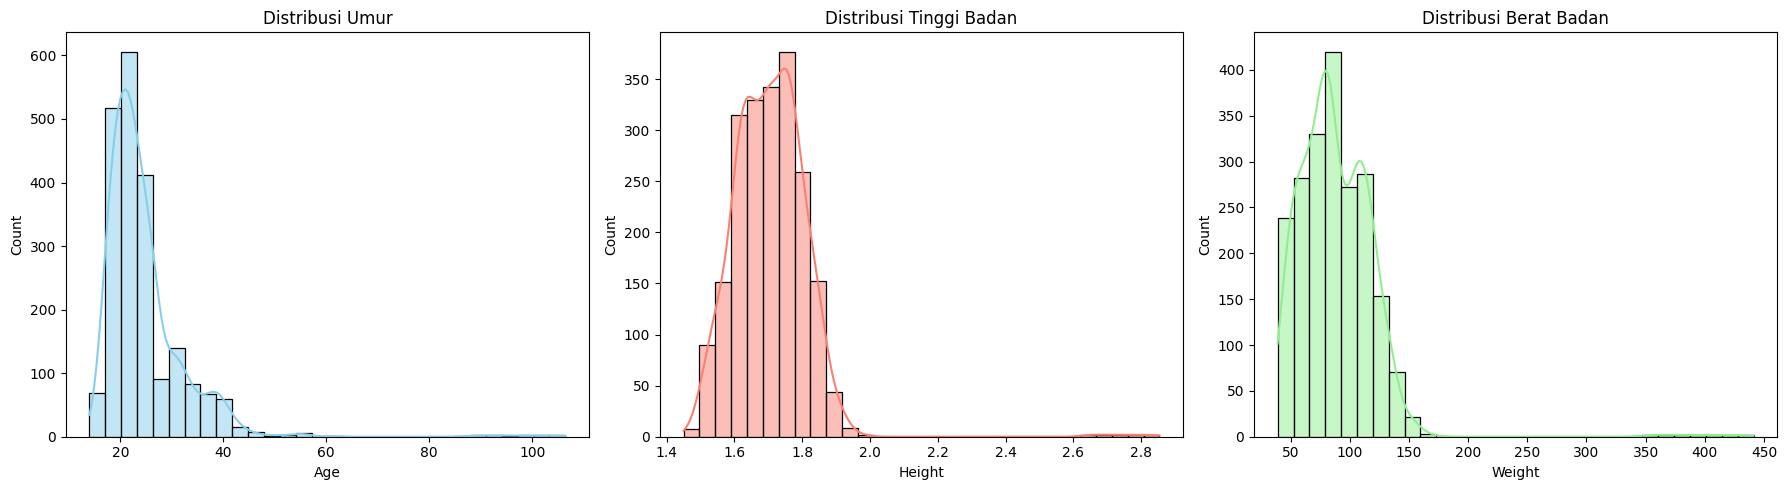

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Umur')
sns.histplot(df['Height'], kde=True, bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Tinggi Badan')
sns.histplot(df['Weight'], kde=True, bins=30, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribusi Berat Badan')
plt.tight_layout()
plt.show()

Definisikan kolom numerik

In [15]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Histogram untuk Usia, Tinggi, dan Berat

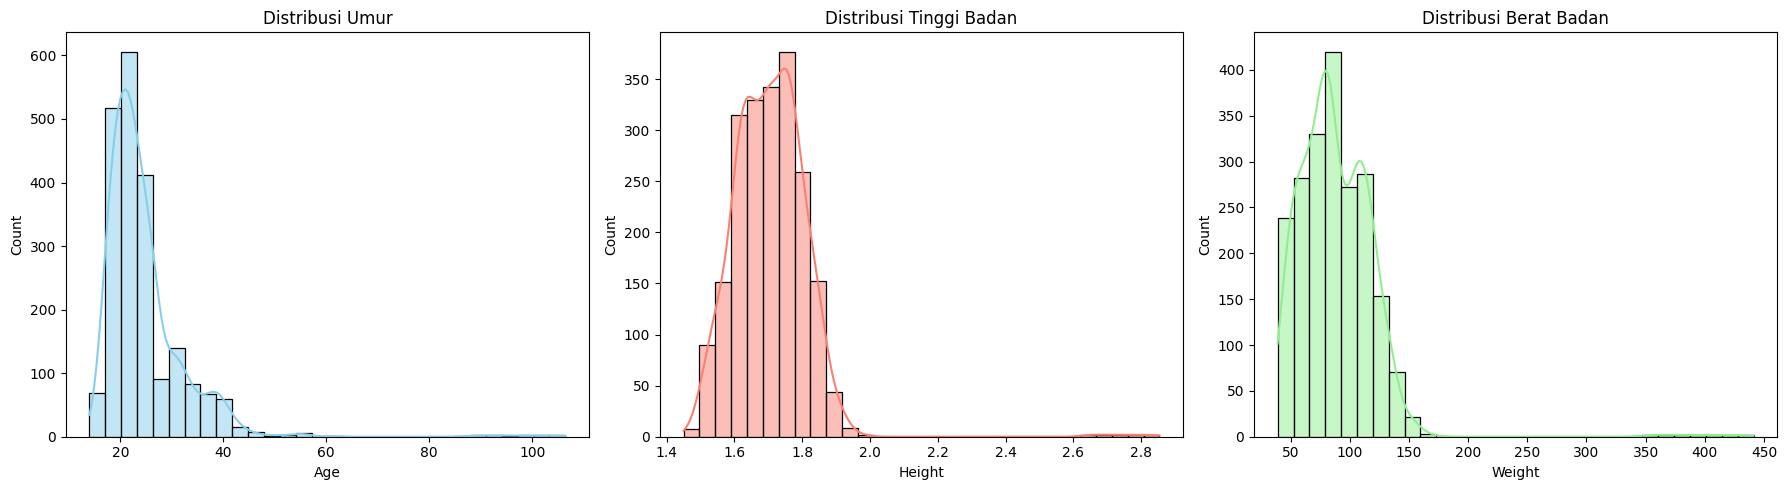

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Umur')
sns.histplot(df['Height'], kde=True, bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Tinggi Badan')
sns.histplot(df['Weight'], kde=True, bins=30, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribusi Berat Badan')
plt.tight_layout()
plt.show()

Heatmap Korelasi antar Fitur Numerik

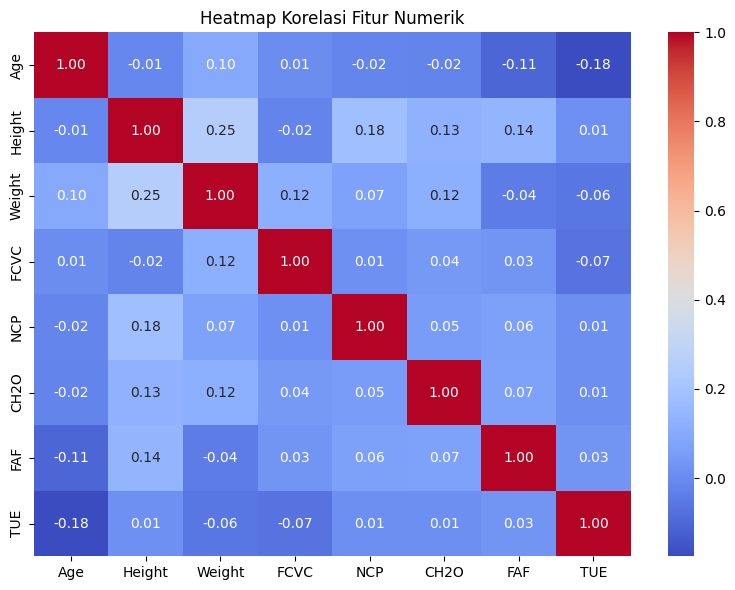

In [18]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

KESIMPULAN

Berdasarkan hasil eksplorasi data (EDA) terhadap dataset obesitas, diketahui bahwa dataset ini terdiri dari 2111 entri dan 17 fitur, yang mencakup kombinasi data kategorikal, biner, kontinu, dan integer. Beberapa kolom memiliki missing values (misalnya: Age, Height, Weight, dll). Ditemukan 18 data duplikat.
Data target (NObeyesdad) memiliki distribusi kelas tidak seimbang. Banyak outlier pada kolom Weight, FAF, TUE, dll. Korelasi tertinggi terdapat antara Height dan Weight.

### Tugas 2. Preprocessing

In [33]:
# Hapus duplikat
df = df.drop_duplicates()

# Jika df hasil dari slicing sebelumnya, gunakan .copy() agar aman dari warning
df = df.copy()

# Cek dan tangani missing values
print("Missing values sebelum ditangani:")
print(df.isnull().sum())

# Tangani missing values: median untuk numerik, modus untuk kategorikal
for col in df.columns:
    if df[col].isnull().sum() > 0:  # Tangani hanya jika ada nilai NaN
        if df[col].dtype in ['float64', 'int64']:
            df.loc[:, col] = df[col].fillna(df[col].median())
        else:
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Cek kembali missing values setelah penanganan
print("\nMissing values setelah ditangani:")
print(df.isnull().sum())

Missing values sebelum ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Missing values setelah ditangani:
Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC               

In [27]:
# Daftar kolom numerik
numerik_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# Buang outlier berdasarkan IQR
for col in numerik_cols:
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah, batas_atas = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    df = df[(df[col] >= batas_bawah) & (df[col] <= batas_atas)]

In [28]:
# Ubah data kategorikal menjadi numerik
from sklearn.preprocessing import LabelEncoder
kategorikal = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
le = LabelEncoder()
for col in kategorikal:
    df[col] = le.fit_transform(df[col])

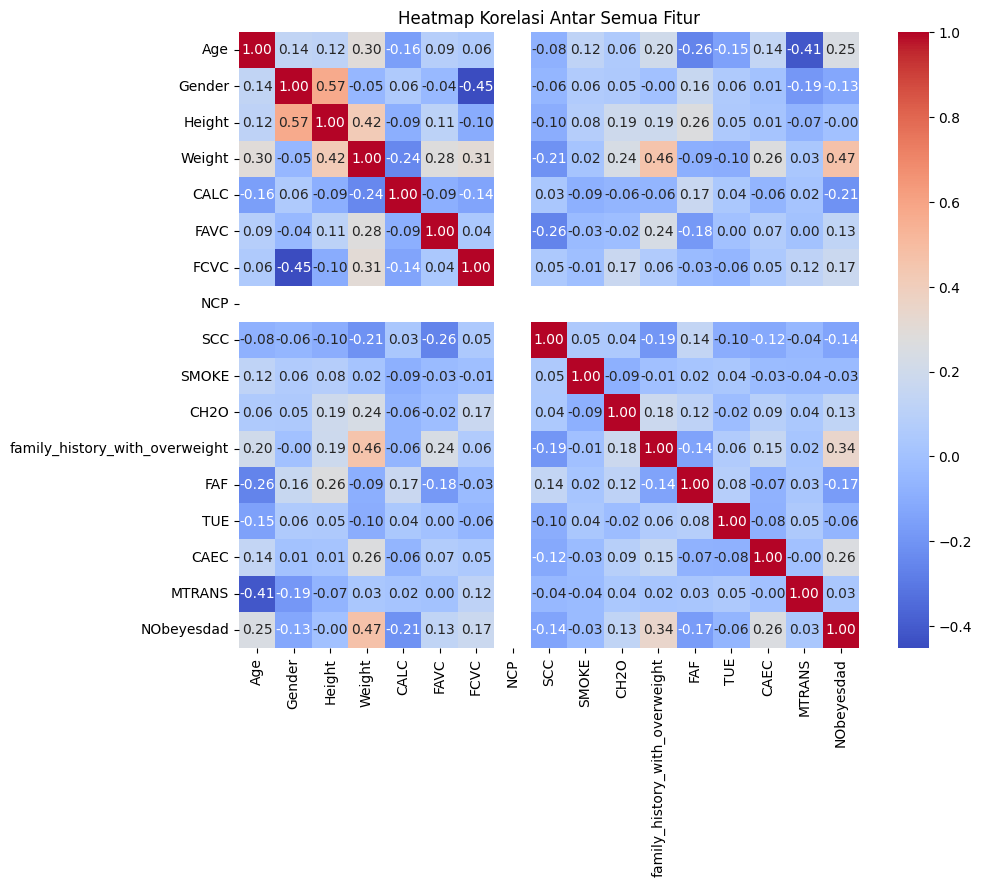

In [29]:
# Menampilkan heatmap korelasi antar semua fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Semua Fitur")
plt.show()

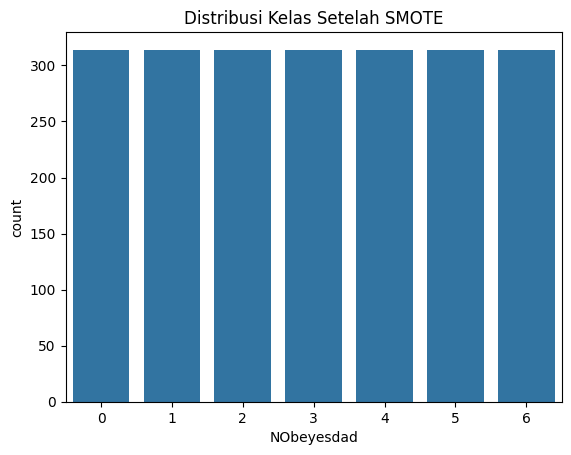

In [30]:
# Mengatasi ketidakseimbangan data pada variabel target NObeyesdad dengan teknik SMOTE
from imblearn.over_sampling import SMOTE
X = df.drop(columns='NObeyesdad')
y = df['NObeyesdad']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
# Tampilkan distribusi kelas hasil SMOTE
sns.countplot(x=y_resampled)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.show()

In [32]:
# Import library StandardScaler dari sklearn
from sklearn.preprocessing import StandardScaler

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi (mean = 0, std = 1) pada data X_resampled
X_scaled = scaler.fit_transform(X_resampled)

In [31]:
# Membagi dataset yang sudah dinormalisasi dan target hasil SMOTE menjadi data latih dan data uji dengan perbandingan 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1758, 16)
y_train shape: (1758,)


KESIMPULAN

preprocessing data menunjukkan bahwa duplikasi berhasil dihapus, semua nilai yang hilang ditangani dengan median untuk fitur numerik dan modus untuk fitur kategorikal, outlier dikurangi menggunakan metode Interquartile Range (IQR) untuk stabilitas distribusi, semua fitur kategorikal diencoding dengan LabelEncoder, seluruh fitur digunakan dalam tahap modeling awal karena variasi korelasi yang beragam, data tidak seimbang diatasi dengan teknik SMOTE (Synthetic Minority Over-sampling Technique), dan semua fitur dinormalisasi menggunakan StandardScaler untuk mendukung algoritma klasifikasi berbasis jarak.